In [ ]:
#Participants
#SQQQ: Inverse QQQ 3X ETF
#YQQQ: Short NQ100 call ETF
#QYLD: NQ100 Covered Call ETF


In [1]:
#Package
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Read excel file
file_path = r'D:\Research_2\QQQ Derivatives.xlsx'
df = pd.read_excel(file_path, index_col='Date', parse_dates=True)

In [3]:

# Calculate daily returns
df['SQQQ Return'] = df['SQQQ'].pct_change()
df['YQQQ Return'] = df['YQQQ'].pct_change()
df['QYLD Return'] = df['QYLD'].pct_change()
df['QQQ Return'] = df['QQQ'].pct_change()

In [4]:

# Remove any rows with NaN values
df = df.dropna()


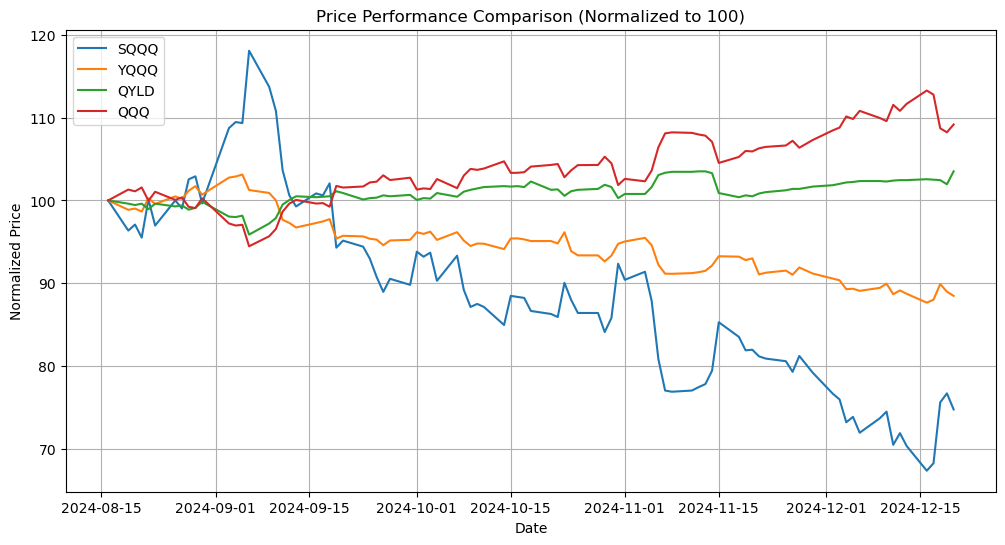

In [5]:
#Normalized plot
# Normalize prices to 100 at the start for comparison
normalized_df = df[['SQQQ','YQQQ','QYLD','QQQ']] / df[['SQQQ','YQQQ','QYLD','QQQ']].iloc[0] * 100

plt.figure(figsize=(12, 6))
plt.plot(normalized_df.index, normalized_df['SQQQ'], label='SQQQ')
plt.plot(normalized_df.index, normalized_df['YQQQ'], label='YQQQ')
plt.plot(normalized_df.index, normalized_df['QYLD'], label='QYLD')
plt.plot(normalized_df.index, normalized_df['QQQ'], label='QQQ')

plt.title('Price Performance Comparison (Normalized to 100)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
#Regression
# Run regressions and store betas
betas = pd.Series()

# Regression for SQQQ against QQQ
X_SQQQ = sm.add_constant(df['QQQ Return'])
model_SQQQ = sm.OLS(df['SQQQ Return'], X_SQQQ).fit()
betas['SQQQ Return'] = model_SQQQ.params['QQQ Return']

# Regression for YQQQ against QQQ
X_YQQQ = sm.add_constant(df['QQQ Return'])
model_YQQQ = sm.OLS(df['YQQQ Return'], X_YQQQ).fit()
betas['YQQQ Return'] = model_YQQQ.params['QQQ Return']

# Regression for QYLD against QQQ  
X_QYLD = sm.add_constant(df['QQQ Return'])
model_QYLD = sm.OLS(df['QYLD Return'], X_QYLD).fit()
betas['QYLD Return'] = model_QYLD.params['QQQ Return']

print("Betas relative to QQQ:")
print(betas)


Betas relative to QQQ:
SQQQ Return   -3.002154
YQQQ Return   -0.670024
QYLD Return    0.430939
dtype: float64


In [7]:
#Dividend information (after 30% tax)
QYLD_DIV=0.1804*0.7
YQQQ_DIV=0.2742*0.7
SQQQ_DIV=0.74748*4/12*0.7

In [8]:
# Calculate regular dividend yields first
df['SQQQ Div Yield'] = (SQQQ_DIV / df['SQQQ']) * 100
df['YQQQ Div Yield'] = (YQQQ_DIV / df['YQQQ']) * 100
df['QYLD Div Yield'] = (QYLD_DIV / df['QYLD']) * 100

# Calculate annualized dividend yields
df['SQQQ Ann Div Yield'] = (SQQQ_DIV * 12 / df['SQQQ']) * 100  # Convert to annual
df['YQQQ Ann Div Yield'] = (YQQQ_DIV * 12 / df['YQQQ']) * 100  # YQQQ is monthly
df['QYLD Ann Div Yield'] = (QYLD_DIV * 12 / df['QYLD']) * 100  # QYLD is monthly

# Print current dividend yields
print("\nCurrent Dividend Yields after tax:")
print(f"SQQQ: {df['SQQQ Div Yield'].iloc[-1]:.2f}%")
print(f"YQQQ: {df['YQQQ Div Yield'].iloc[-1]:.2f}%")
print(f"QYLD: {df['QYLD Div Yield'].iloc[-1]:.2f}%")

# Print current annualized dividend yields
print("\nCurrent Annualized Dividend Yields after tax:")
print(f"SQQQ: {df['SQQQ Ann Div Yield'].iloc[-1]:.2f}%")
print(f"YQQQ: {df['YQQQ Ann Div Yield'].iloc[-1]:.2f}%")
print(f"QYLD: {df['QYLD Ann Div Yield'].iloc[-1]:.2f}%")


Current Dividend Yields after tax:
SQQQ: 0.57%
YQQQ: 1.11%
QYLD: 0.68%

Current Annualized Dividend Yields after tax:
SQQQ: 6.81%
YQQQ: 13.28%
QYLD: 8.17%


In [11]:
################################Arbitrage 1: QYLD vs YQQQ##########################

# Initial investment amounts adjusted by their betas
QYLD_beta = betas['QYLD Return']
YQQQ_beta = -betas['YQQQ Return']
print(QYLD_beta)
print(YQQQ_beta)

Input_Investment_For_Each=5000

# Adjust investment by beta
QYLD_investment = Input_Investment_For_Each*QYLD_beta
YQQQ_investment =Input_Investment_For_Each*YQQQ_beta 

print(QYLD_investment)
print(YQQQ_investment)

Adjustment_Factor=(YQQQ_beta/QYLD_beta)
print(Adjustment_Factor)

QYLD_investment_adjusted=QYLD_investment*(Adjustment_Factor)
print(QYLD_investment_adjusted)

QYLD_delta_value=QYLD_investment_adjusted*0.01
YQQQ_delta_value=YQQQ_investment*0.01

print(QYLD_delta_value)
print(YQQQ_delta_value)

# Calculate number of shares based on latest prices
QYLD_shares = QYLD_investment_adjusted / df['QYLD'].iloc[-1]
YQQQ_shares = YQQQ_investment / df['YQQQ'].iloc[-1]

print(QYLD_shares)
print(YQQQ_shares)

# Calculate monthly dividend income
QYLD_monthly_income = QYLD_shares * QYLD_DIV
YQQQ_monthly_income = YQQQ_shares * YQQQ_DIV

# Calculate annual dividend income
QYLD_annual_income = QYLD_monthly_income * 12
YQQQ_annual_income = YQQQ_monthly_income * 12

0.4309391978979653
0.6700235196943304
2154.6959894898264
3350.117598471652
1.5547982707597041
3350.1175984716515
33.50117598471652
33.50117598471652
180.59933145399737
193.20170694761546


In [12]:
print("Investment Analysis (Beta-Adjusted):")
print("QYLD Investment:")
print(f"Beta: {QYLD_beta:.2f}")
print(f"Beta-Adjusted Investment Amount: ${QYLD_investment_adjusted:,.2f}")
print(f"Shares Purchased: {QYLD_shares:,.2f}")
print(f"Monthly Dividend Income: ${QYLD_monthly_income:,.2f}")
print(f"Annual Dividend Income: ${QYLD_annual_income:,.2f}")

print("\nYQQQ Investment:")
print(f"Beta: {YQQQ_beta:.2f}")
print(f"Beta-Adjusted Investment Amount: ${YQQQ_investment:,.2f}")
print(f"Shares Purchased: {YQQQ_shares:,.2f}")
print(f"Monthly Dividend Income: ${YQQQ_monthly_income:,.2f}")
print(f"Annual Dividend Income: ${YQQQ_annual_income:,.2f}")

print("\nTotal Portfolio_arb1:")
print(f"Total Investment_arb1: ${total_investment_arb1:,.2f}")
print(f"Total Monthly Income_arb1: ${total_monthly_income_arb1:,.2f}")
print(f"Total Annual Income_arb1: ${total_annual_income_arb1:,.2f}")
print(f"Portfolio Yield_arb1: {portfolio_yield_arb1:.2f}%")

Investment Analysis (Beta-Adjusted):
QYLD Investment:
Beta: 0.43
Beta-Adjusted Investment Amount: $3,350.12
Shares Purchased: 180.60
Monthly Dividend Income: $22.81
Annual Dividend Income: $273.67

YQQQ Investment:
Beta: 0.67
Beta-Adjusted Investment Amount: $3,350.12
Shares Purchased: 193.20
Monthly Dividend Income: $37.08
Annual Dividend Income: $445.00

Total Portfolio_arb1:
Total Investment_arb1: $6,700.24
Total Monthly Income_arb1: $59.89
Total Annual Income_arb1: $718.67
Portfolio Yield_arb1: 10.73%


In [13]:
################################Arbitrage 2: QYLD vs SQQQ##########################
# Initial investment amounts adjusted by their betas
QYLD_beta = betas['QYLD Return']
SQQQ_beta = -betas['SQQQ Return']

Input_Investment_For_Each=5000

# Adjust investment by beta
QYLD_investment = Input_Investment_For_Each*QYLD_beta 
SQQQ_investment = Input_Investment_For_Each* SQQQ_beta 


# Calculate adjustment factor to equalize positions
Adjustment_Factor_2 = SQQQ_beta/QYLD_beta 
print(Adjustment_Factor_2)

# Adjust QYLD investment to match SQQQ investment
QYLD_investment_adjusted = QYLD_investment * Adjustment_Factor_2


# Calculate delta values (1% move impact)
QYLD_delta_value = QYLD_investment_adjusted * 0.01
SQQQ_delta_value = SQQQ_investment * 0.01
print(QYLD_delta_value)
print(SQQQ_delta_value)

# Calculate number of shares based on latest prices
QYLD_shares = QYLD_investment_adjusted / df['QYLD'].iloc[-1]
SQQQ_shares = SQQQ_investment / df['SQQQ'].iloc[-1]


# Calculate monthly dividend income
QYLD_monthly_income = QYLD_shares * QYLD_DIV
SQQQ_monthly_income = SQQQ_shares * SQQQ_DIV

# Calculate annual dividend income
QYLD_annual_income = QYLD_monthly_income * 12
SQQQ_annual_income = SQQQ_monthly_income * 12

6.96653701874987
150.10769374932755
150.10769374932758


In [15]:
# Calculate total portfolio statistics
total_investment_arb2 = QYLD_investment_adjusted + SQQQ_investment
total_monthly_income_arb2 = QYLD_monthly_income + SQQQ_monthly_income
total_annual_income_arb2 = QYLD_annual_income + SQQQ_annual_income
portfolio_yield_arb2 = (total_annual_income_arb2/ total_investment_arb2) * 100

print("Investment Analysis (Beta-Adjusted):")
print("QYLD Investment:")
print(f"Beta: {QYLD_beta:.2f}")
print(f"Beta-Adjusted Investment Amount: ${QYLD_investment_adjusted:,.2f}")
print(f"Shares Purchased: {QYLD_shares:,.2f}")
print(f"Monthly Dividend Income: ${QYLD_monthly_income:,.2f}")
print(f"Annual Dividend Income: ${QYLD_annual_income:,.2f}")

print("\nSQQQ Investment:")
print(f"Beta: {SQQQ_beta:.2f}")
print(f"Beta-Adjusted Investment Amount: ${SQQQ_investment:,.2f}")
print(f"Shares Purchased: {SQQQ_shares:,.2f}")
print(f"Monthly Dividend Income: ${SQQQ_monthly_income:,.2f}")
print(f"Annual Dividend Income: ${SQQQ_annual_income:,.2f}")

print("\nTotal Portfolio_arb2:")
print(f"Total Investment_arb2: ${total_investment_arb2:,.2f}")
print(f"Total Monthly Income_arb2: ${total_monthly_income_arb2:,.2f}")
print(f"Total Annual Income_arb2: ${total_annual_income_arb2:,.2f}")
print(f"Portfolio Yield_arb2: {portfolio_yield_arb2:.2f}%")

Investment Analysis (Beta-Adjusted):
QYLD Investment:
Beta: 0.43
Beta-Adjusted Investment Amount: $15,010.77
Shares Purchased: 809.21
Monthly Dividend Income: $102.19
Annual Dividend Income: $1,226.24

SQQQ Investment:
Beta: 3.00
Beta-Adjusted Investment Amount: $15,010.77
Shares Purchased: 488.16
Monthly Dividend Income: $85.14
Annual Dividend Income: $1,021.68

Total Portfolio_arb2:
Total Investment_arb2: $30,021.54
Total Monthly Income_arb2: $187.33
Total Annual Income_arb2: $2,247.92
Portfolio Yield_arb2: 7.49%


In [ ]:
#After comparing the arbitrage pairs between QYLD vs YQQQ and QYLD vs SQQQ, 
#the arbitrage between QYLD vs YQQQ earns higher dividend yield  